In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import levene, kruskal, shapiro, pearsonr, spearmanr
import statsmodels.api as sm

In [3]:
data = pd.read_csv("Student Attitude and Behavior.csv")

In [3]:
data.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Certification Course                                    235 non-null    object 
 1   Gender                                                  235 non-null    object 
 2   Department                                              235 non-null    object 
 3   Height(CM)                                              235 non-null    float64
 4   Weight(KG)                                              235 non-null    float64
 5   10th Mark                                               235 non-null    float64
 6   12th Mark                                               235 non-null    float64
 7   college mark                                            235 non-null    float64
 8   hobbies                                 

In [5]:
print(data.describe())

       Height(CM)  Weight(KG)   10th Mark   12th Mark  college mark  \
count  235.000000  235.000000  235.000000  235.000000    235.000000   
mean   157.402128   60.803830   76.848511   68.775872     70.660553   
std     21.510805   14.895844   13.047560   11.018192     15.727446   
min      4.500000   20.000000    7.400000   45.000000      1.000000   
25%    152.000000   50.000000   70.000000   60.000000     60.000000   
50%    160.000000   60.000000   80.000000   69.000000     70.000000   
75%    170.000000   70.000000   86.250000   76.000000     80.000000   
max    192.000000  106.000000   98.000000   94.000000    100.000000   

       salary expectation  
count        2.350000e+02  
mean         3.248168e+04  
std          1.113146e+05  
min          0.000000e+00  
25%          1.500000e+04  
50%          2.000000e+04  
75%          2.500000e+04  
max          1.500000e+06  


In [6]:
print(data['Stress Level '].value_counts())

Stress Level 
Good        137
Bad          68
Awful        19
fabulous     11
Name: count, dtype: int64


In [7]:
plt.rcParams['font.family'] = 'NanumGothic' 

## 1. 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 있는가

### histplot

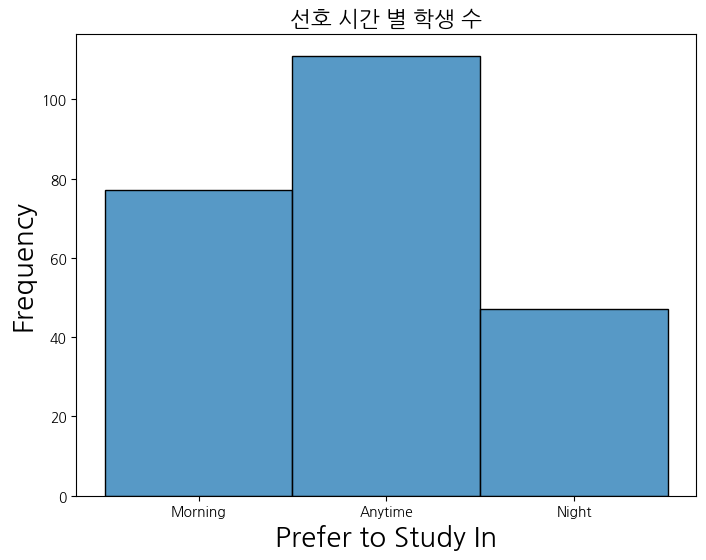

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='prefer to study in', bins=10)
plt.xlabel('Prefer to Study In', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('선호 시간 별 학생 수', fontsize=16)
plt.show()

### boxplot

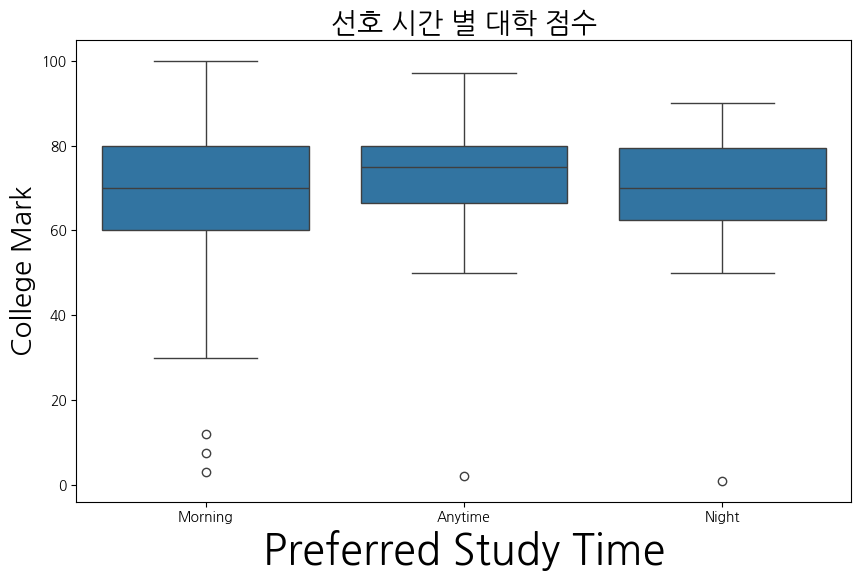

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='prefer to study in', y='college mark')
plt.xlabel('Preferred Study Time', fontsize=20)  # x축 제목
plt.ylabel('College Mark', fontsize=20)          # y축 제목
plt.title('선호 시간 별 대학 점수', fontsize=20)  # 그래프 제목
plt.show()

### q-q plot

C:\Users\Lee Tae Han\AppData\Local\Temp\ipykernel_34860\2576573875.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


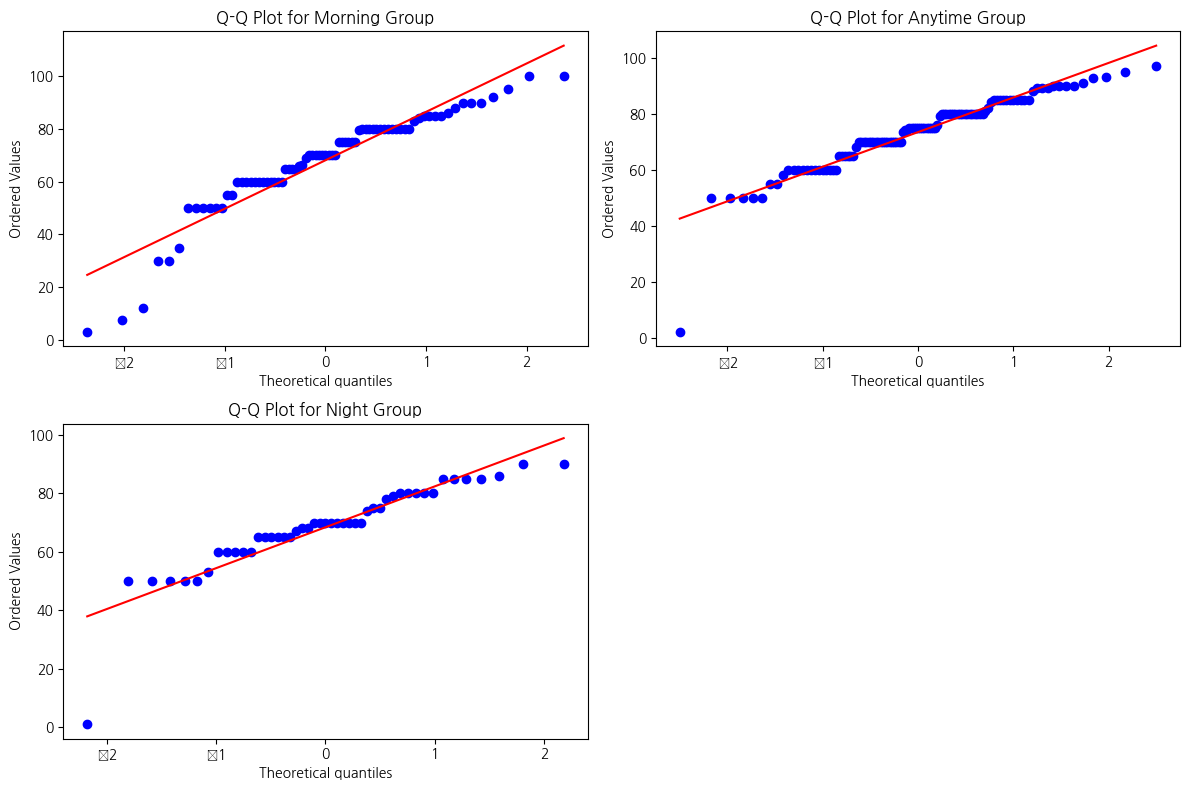

In [11]:
# 정규성 시각화(Q-Q Plot)
groups = data['prefer to study in'].unique()
plt.figure(figsize=(12, 8))

for i, group in enumerate(groups):
    plt.subplot(2, 2, i + 1)
    group_data = data[data['prefer to study in'] == group]['college mark']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {group} Group')

plt.tight_layout()
plt.show()

### q-q plot 담으실때 크기 안맞으면 이용

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


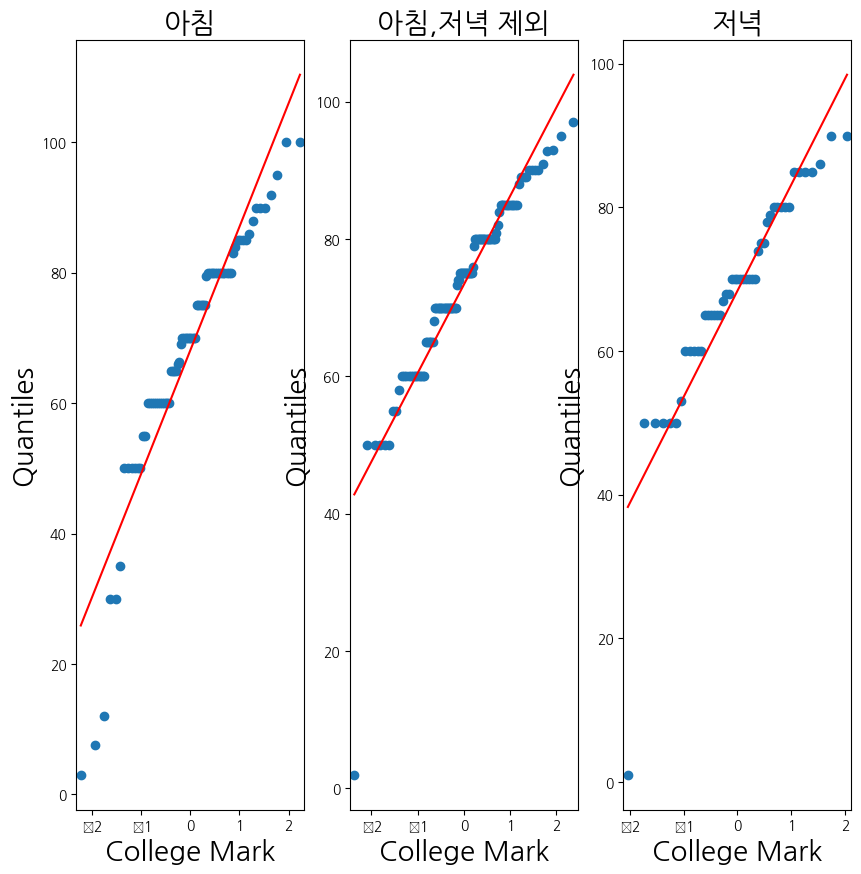

<Figure size 600x600 with 0 Axes>

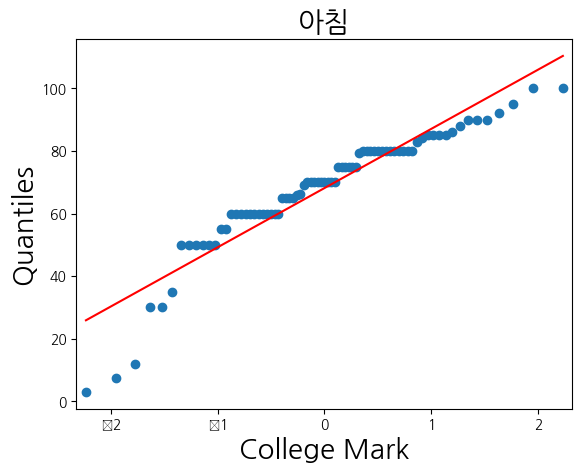

In [13]:
# import statsmodels.api as sm
# import matplotlib.pyplot as plt

# fig, axes = plt.subplots(1,3, figsize = (10,10))

# # Morning
# sm.qqplot(data[data['prefer to study in'] == 'Morning']['college mark'], ax = axes[0],line = 's')
# axes[0].set_title('아침', fontsize=20)
# axes[0].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
# axes[0].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# # Anytime
# sm.qqplot(data[data['prefer to study in'] == 'Anytime']['college mark'], ax = axes[1],line = 's')
# axes[1].set_title('아침,저녁 제외', fontsize=20)
# axes[1].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
# axes[1].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# # Night
# sm.qqplot(data[data['prefer to study in'] == 'Night']['college mark'], ax = axes[2],line = 's')
# axes[2].set_title('저녁', fontsize=20)
# axes[2].set_xlabel('College Mark', fontsize=20)  # x축 이름 설정
# axes[2].set_ylabel('Quantiles', fontsize=20)    # y축 이름 설정

# plt.show()

# # 따로 나눠서 plot
# # Morning
# plt.figure(figsize=(6, 6))
# sm.qqplot(data[data['prefer to study in'] == 'Morning']['college mark'], line='s')
# plt.title('아침', fontsize=20)
# plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
# plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
# plt.show()
# # # Anytime
# # plt.figure(figsize=(6, 6))
# # sm.qqplot(data[data['prefer to study in'] == 'Anytime']['college mark'], line='s')
# # plt.title('아침 저녁 제외', fontsize=20)
# # plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
# # plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
# # plt.show()
# # # Night
# # plt.figure(figsize=(6, 6))
# # sm.qqplot(data[data['prefer to study in'] == 'Night']['college mark'], line='s')
# # plt.title('저녁', fontsize=20)
# # plt.xlabel('College Mark', fontsize=20)  # x축 이름 설정
# # plt.ylabel('Quantiles', fontsize=20)    # y축 이름 설정
# # plt.show()

### Shapiro-Wilk Test

In [11]:
print("Shapiro-Wilk Test Results:")
for group in groups:
    group_data = data[data['prefer to study in'] == group]['college mark']
    stat, p_value = shapiro(group_data)
    print(f"{group}: W={stat:.4f}, p-value={p_value}")

Shapiro-Wilk Test Results:
Morning: W=0.8990, p-value=1.5592280760756694e-05
Anytime: W=0.8949, p-value=2.629047912705573e-07
Night: W=0.8447, p-value=1.88336125575006e-05


### distplot

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


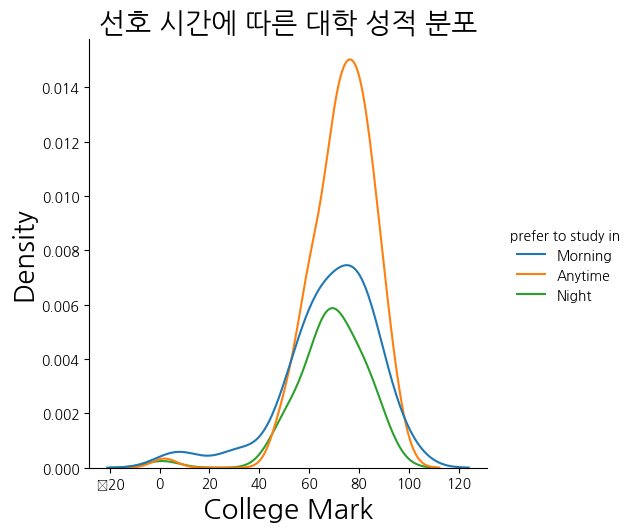

In [15]:
sns.displot(data = data, x = 'college mark', hue = 'prefer to study in', kind = 'kde')

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('선호 시간에 따른 대학 성적 분포', fontsize=20)

# 그래프 보여주기
plt.show()

### Levene Test

In [13]:
grouped_data = [data[data['prefer to study in'] == group]['college mark'] for group in groups]

stat, p_value = levene(*grouped_data)
print(f"Levene Test: W={stat:.4f}, p-value={p_value}")

Levene Test: W=3.7058, p-value=0.0260475977589146


### kruskal

In [14]:
stress_groups = data.groupby('prefer to study in')['college mark'].apply(list)

stat_kruskal, p_kruskal = kruskal(*stress_groups)

print(f"Kruskal-Wallis 검정 통계량: {stat_kruskal:.3f}, p-value = {p_kruskal}")

if p_kruskal < 0.05:
    print("p-value가 0.05보다 작으므로, 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 있습니다.")
else:
    print("p-value가 0.05보다 크므로, 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 없습니다.")

Kruskal-Wallis 검정 통계량: 5.817, p-value = 0.05455876245308604
p-value가 0.05보다 크므로, 공부 선호 시간대에 따라 대학 성적에 유의미한 차이가 없습니다.


## 2. 스트레스 레벨과 대학 성적에 유의미한 차이가 있는지

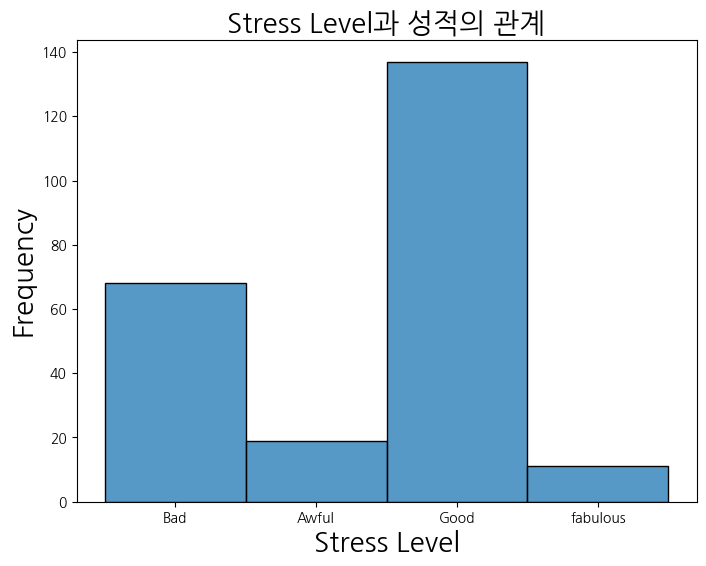

In [28]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='Stress Level ', bins=10)
plt.title('Stress Level과 성적의 관계', fontsize=20)
plt.xlabel('Stress Level', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.show()

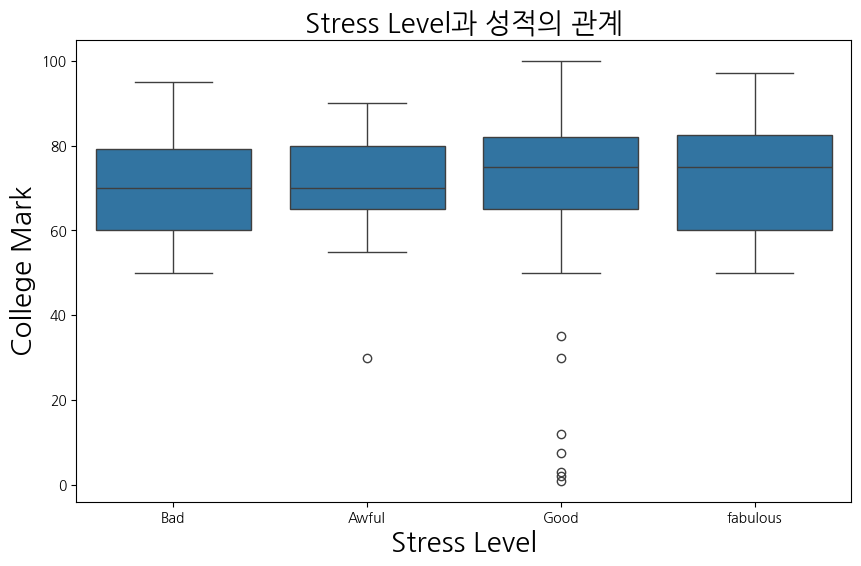

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Stress Level과 college mark의 분포를 박스 플롯으로 시각화
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Stress Level ', y='college mark')
plt.title('Stress Level과 성적의 관계', fontsize=20)
plt.xlabel('Stress Level', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()

### q-q plot

C:\Users\Lee Tae Han\AppData\Local\Temp\ipykernel_34860\127157394.py:15: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


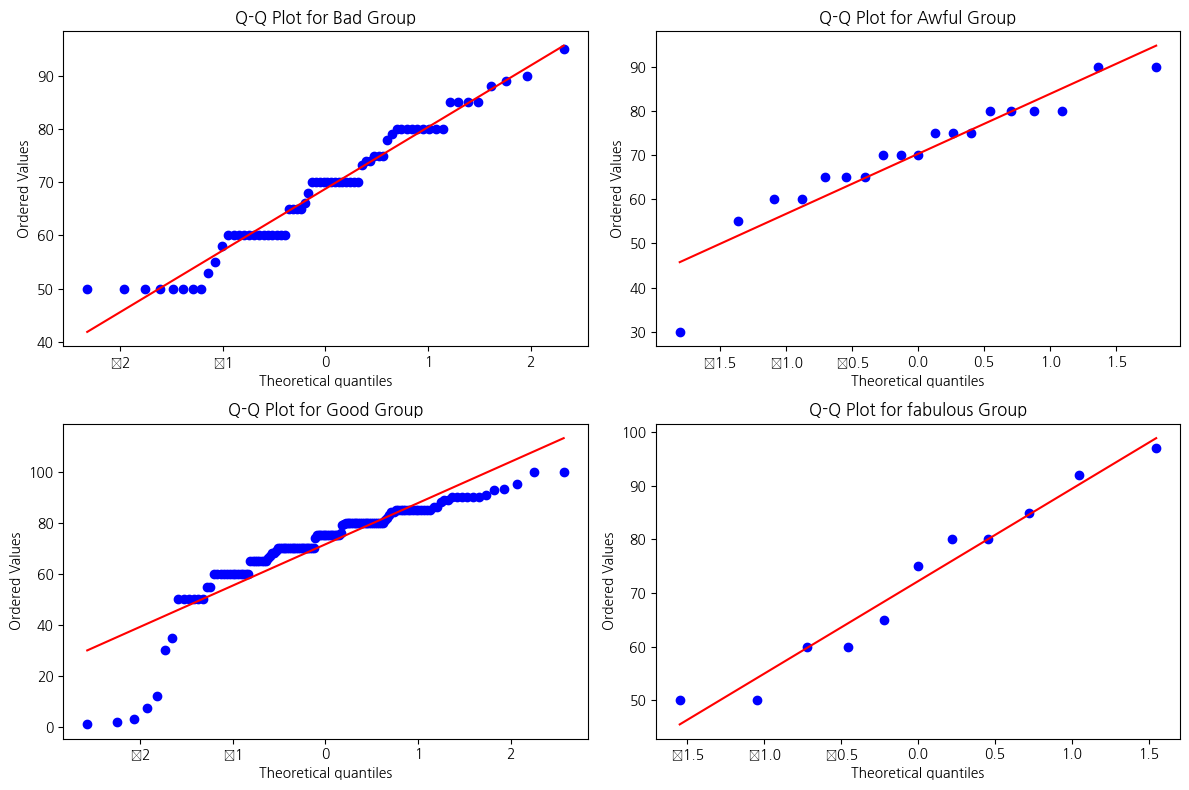

In [19]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# 정규성 시각화(Q-Q Plot)
groups = data['Stress Level '].unique()
plt.figure(figsize=(12, 8))

for i, group in enumerate(groups):
    plt.subplot(2, 2, i + 1)
    group_data = data[data['Stress Level '] == group]['college mark']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {group} Group')

plt.tight_layout()
plt.show()

In [18]:
# Shapiro-Wilk Test for each group
print("Shapiro-Wilk Test Results:")
for group in groups:
    group_data = data[data['Stress Level '] == group]['college mark']
    stat, p_value = shapiro(group_data)
    print(f"{group}: W={stat:.4f}, p-value={p_value}")

Shapiro-Wilk Test Results:
Bad: W=0.9587, p-value=0.024217065423727036
Awful: W=0.9019, p-value=0.05271768569946289
Good: W=0.8180, p-value=9.548450571883471e-12
fabulous: W=0.9412, p-value=0.5349101424217224


### displot

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


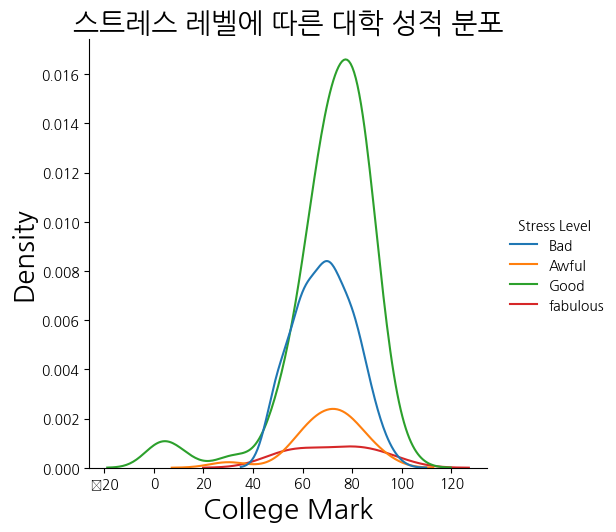

In [30]:
sns.displot(data = data, x = 'college mark', hue = 'Stress Level ', kind = 'kde')

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('스트레스 레벨에 따른 대학 성적 분포', fontsize=20)

# 그래프 보여주기
plt.show()

In [20]:
# 그룹별 데이터 추출
grouped_data = [data[data['Stress Level '] == group]['college mark'] for group in groups]

# Levene Test 실행
stat, p_value = levene(*grouped_data)
print(f"Levene Test: W={stat:.4f}, p-value={p_value}")

Levene Test: W=0.9199, p-value=0.43190771637438174


In [21]:
# 그룹별 데이터 추출
grouped_data = [data[data['Stress Level '] == group]['college mark'] for group in groups]

# Kruskal-Wallis Test 실행
stat, p_value = kruskal(*grouped_data)
print(f"Kruskal-Wallis Test: H-statistic={stat:.4f}, p-value={p_value}")

# 결과 해석
if p_value < 0.05:
    print("스트레스 레벨 그룹 간의 성적 차이가 유의미합니다.")
else:
    print("스트레스 레벨 그룹 간의 성적 차이가 유의미하지 않습니다.")


Kruskal-Wallis Test: H-statistic=7.1139, p-value=0.06835412889929356
스트레스 레벨 그룹 간의 성적 차이가 유의미하지 않습니다.


## 3. 일일 공부시간에 따른 대학 성적의 차이가 유의미한지

In [32]:
data.rename(columns={'daily studing time': 'daily studying time'}, inplace=True)

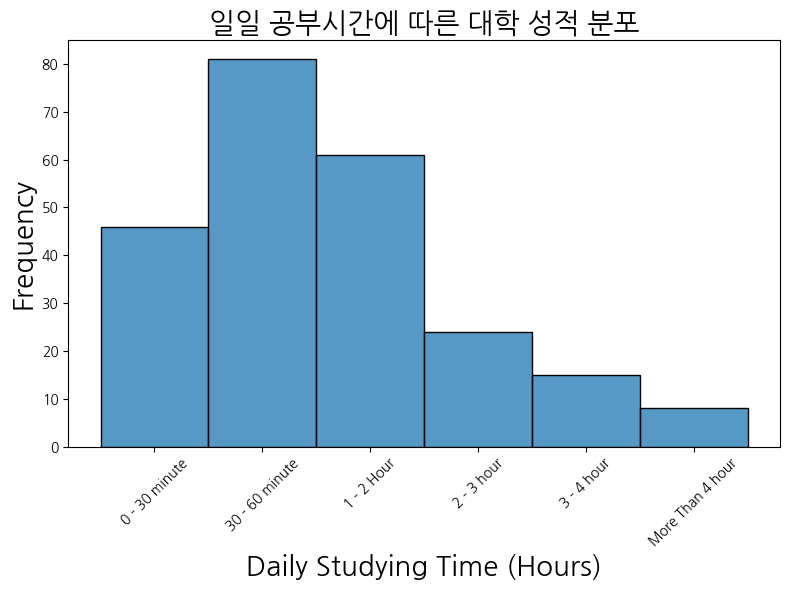

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='daily studying time', bins=10)
plt.title('일일 공부시간에 따른 대학 성적 분포', fontsize=20)
plt.xlabel('Daily Studying Time (Hours)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

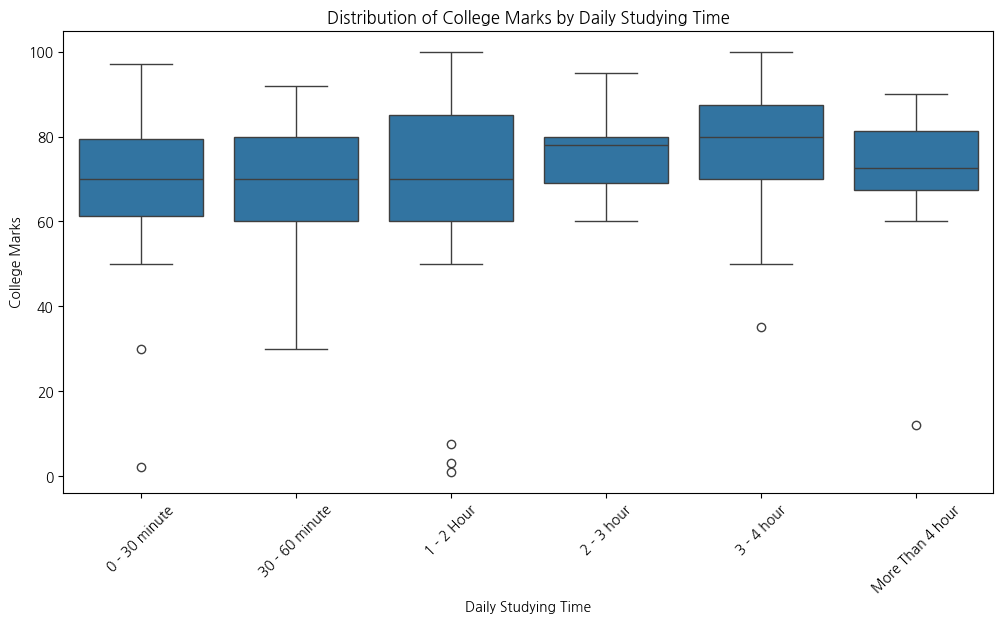

In [24]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='daily studying time', y='college mark')
plt.title('일일 공부시간에 따른 대학 성적 분포')
plt.xlabel('Daily Studying Time')
plt.ylabel('College Marks')
plt.xticks(rotation=45)
plt.show()

/var/folders/69/7p2x49x572l1_y7zyr6zqhs80000gn/T/ipykernel_5756/957414367.py:11: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  plt.tight_layout()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


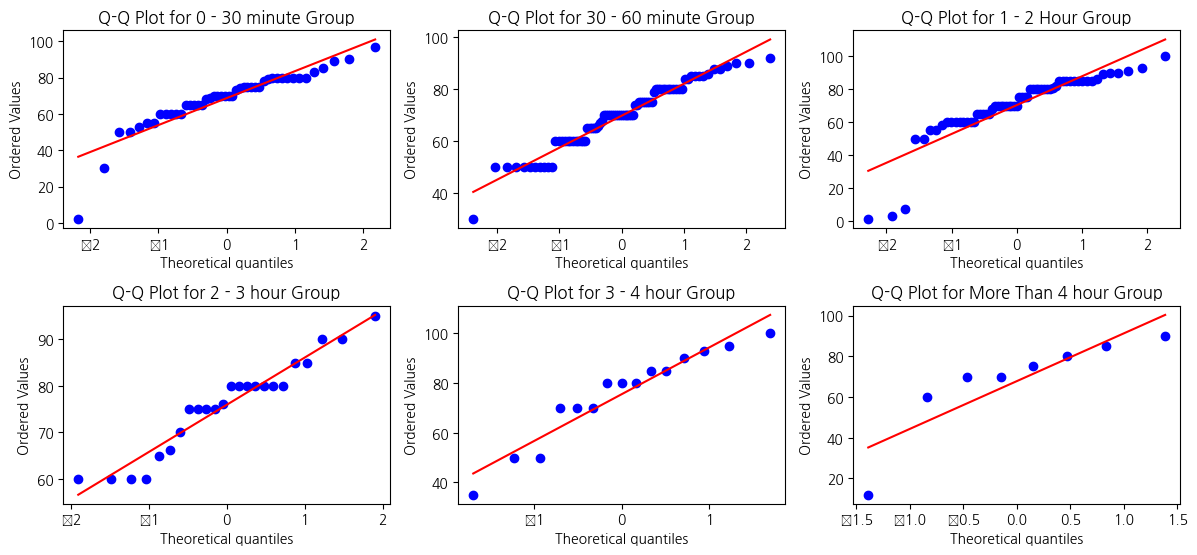

In [25]:
# 정규성 시각화(Q-Q Plot)
groups = data['daily studying time'].unique()
plt.figure(figsize=(12, 8))

for i, group in enumerate(groups):
    plt.subplot(3, 3, i + 1)
    group_data = data[data['daily studying time'] == group]['college mark']
    stats.probplot(group_data, dist="norm", plot=plt)
    plt.title(f'Q-Q Plot for {group} Group')

plt.tight_layout()
plt.show()

In [26]:
# Shapiro-Wilk Test for each group
print("Shapiro-Wilk Test Results:")
for group in groups:
    group_data = data[data['daily studying time'] == group]['college mark']
    stat, p_value = shapiro(group_data)
    print(f"{group}: W={stat:.4f}, p-value={p_value}")

Shapiro-Wilk Test Results:
0 - 30 minute: W=0.8590, p-value=5.322670767782256e-05
30 - 60 minute: W=0.9569, p-value=0.008196129463613033
1 - 2 Hour: W=0.8072, p-value=1.7210558667102305e-07
2 - 3 hour: W=0.9313, p-value=0.10449011623859406
3 - 4 hour: W=0.9183, p-value=0.18115299940109253
More Than 4 hour: W=0.7822, p-value=0.01840345375239849


C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


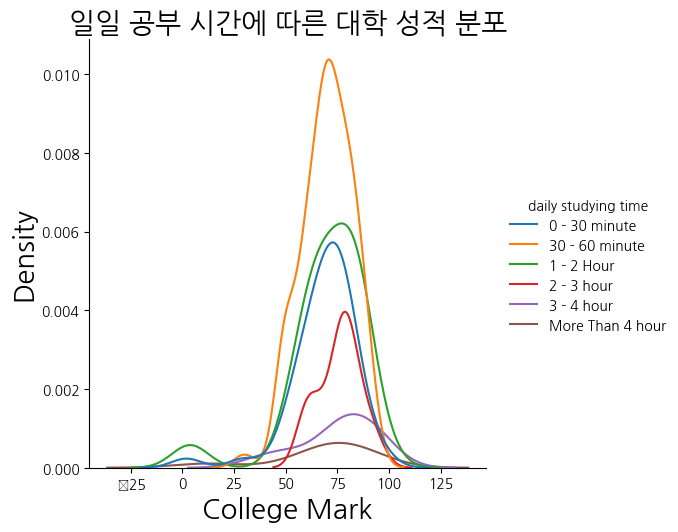

In [34]:
sns.displot(data = data, x = 'college mark', hue = 'daily studying time', kind = 'kde')

# 폰트 크기 설정
plt.xlabel('College Mark', fontsize=20)
plt.ylabel('Density', fontsize=20)
plt.title('일일 공부 시간에 따른 대학 성적 분포', fontsize=20)

# 그래프 보여주기
plt.show()

In [28]:
# 그룹별 데이터 추출
grouped_data = [data[data['daily studying time'] == group]['college mark'] for group in groups]

# Levene Test 실행
stat, p_value = levene(*grouped_data)
print(f"Levene Test: W={stat:.4f}, p-value={p_value}")

Levene Test: W=1.4017, p-value=0.22450763064026422


In [29]:
# 그룹별 데이터 추출
grouped_data = [data[data['daily studying time'] == group]['college mark'] for group in groups]

# Kruskal-Wallis Test 실행
stat, p_value = kruskal(*grouped_data)
print(f"Kruskal-Wallis Test: H-statistic={stat:.4f}, p-value={p_value}")

# 결과 해석
if p_value < 0.05:
    print("일일 공부 시간에 따른 성적 차이가 유의미합니다.")
else:
    print("일일 공부시간에 따른 성적 차이가 유의미하지 않습니다.")


Kruskal-Wallis Test: H-statistic=8.0479, p-value=0.15361573888095076
일일 공부시간에 따른 성적 차이가 유의미하지 않습니다.


## 4 소셜 미디어/비디오 사용 시간에 따른 성적의 차이가 유의미한지

In [36]:
data.rename(columns={'social medai & video': 'social media & video'}, inplace=True)

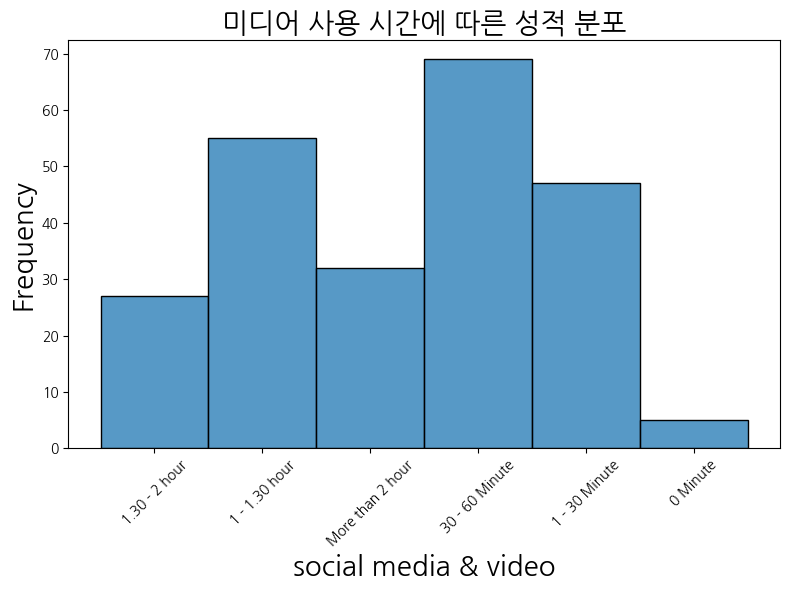

In [37]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='social media & video', bins=10)
plt.title('미디어 사용 시간에 따른 성적 분포', fontsize = 20)
plt.xlabel('social media & video', fontsize = 20)
plt.ylabel('Frequency', fontsize = 20)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

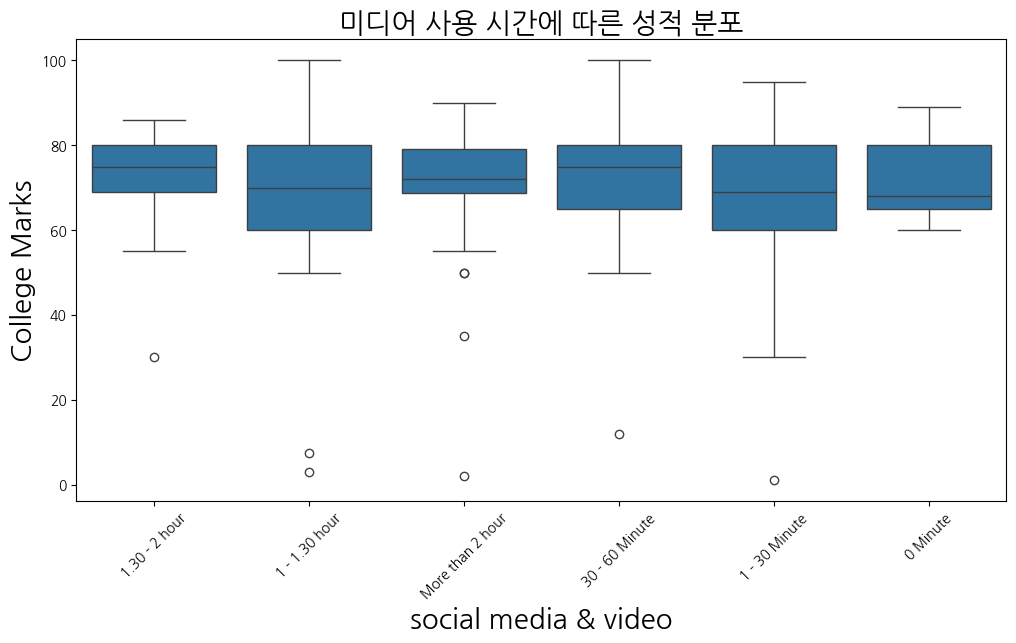

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='social media & video', y='college mark')
plt.title('미디어 사용 시간에 따른 성적 분포', fontsize = 20)
plt.xlabel('social media & video', fontsize = 20)
plt.ylabel('College Marks', fontsize = 20)
plt.xticks(rotation=45)
plt.show()

In [33]:
# social media & videos 행 숫자로 변경
def convert_hours(time):
    time = time.strip()
    if "0 Minute" == time :
        return 0
    elif "1 - 30 Minute" == time:
        return 0.25
    elif "30 - 60 Minute" == time:
        return 0.75
    elif "1 - 1.30 hour" == time:
        return 1.25
    elif "1.30 - 2 hour" == time:
        return 1.75
    elif "More than 2 hour" == time:
        return 2.25
        
data["social media & video hours"] = data["social media & video"].apply(convert_hours)

#1을 기준으로 1시간 이하 사용, 1시간 이상 사용으로 그룹화 
median = 1
low_use = data[data["social media & video hours"] <= median]["college mark"]
high_use = data[data["social media & video hours"] > median]["college mark"]

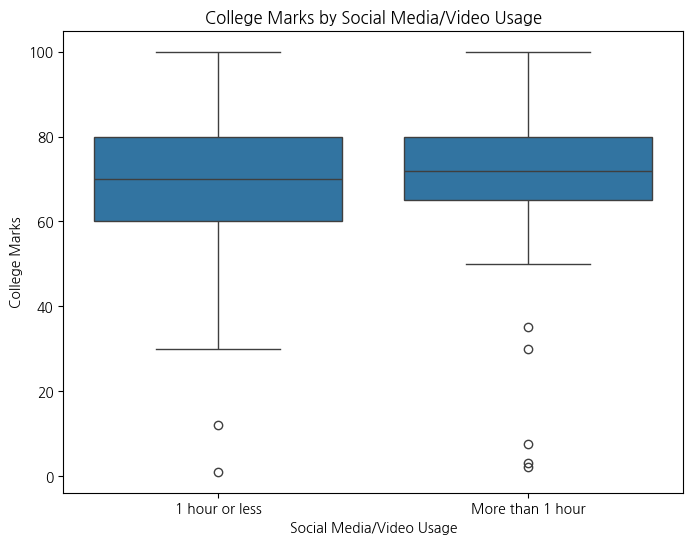

In [34]:
grouped_data = pd.DataFrame({
    "Group": ["1 hour or less"] * len(low_use) + ["More than 1 hour"] * len(high_use),
    "College Mark": pd.concat([low_use, high_use])
})

# 박스플롯 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=grouped_data, x="Group", y="College Mark")
plt.title("미디어 이용 시간에 ",fontsize = 20)
plt.xlabel("Social Media/Video Usage",fontsize = 20)
plt.ylabel("College Marks",fontsize = 20)
plt.show()

In [35]:
print(shapiro(low_use))
print(shapiro(high_use))

ShapiroResult(statistic=0.9056746959686279, pvalue=3.531681613822002e-07)
ShapiroResult(statistic=0.8488395810127258, pvalue=1.9900090464375353e-09)


/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/opt/anaconda3/envs/sda2024/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


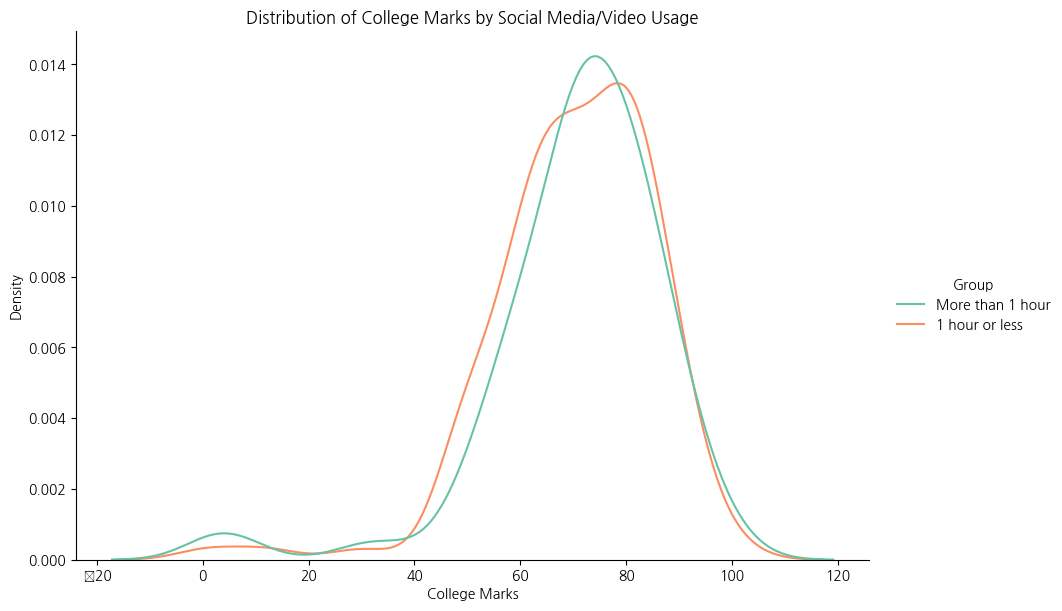

In [36]:
data['Group'] = data['social media & video hours'].apply(lambda x: '1 hour or less' if x <= median else 'More than 1 hour')

# KDE 플롯 그리기
sns.displot(data=data, x='college mark', hue='Group', kind='kde', height=6, aspect=1.5, palette="Set2")
plt.title("Distribution of College Marks by Social Media/Video Usage")
plt.xlabel("College Marks")
plt.ylabel("Density")
plt.show()

In [37]:
stat, p = kruskal(low_use, high_use)
print(stat, p)

0.39146744991749033 0.5315290547250976


## 5. 10학년 성적과 대학 성적간의 상관관계

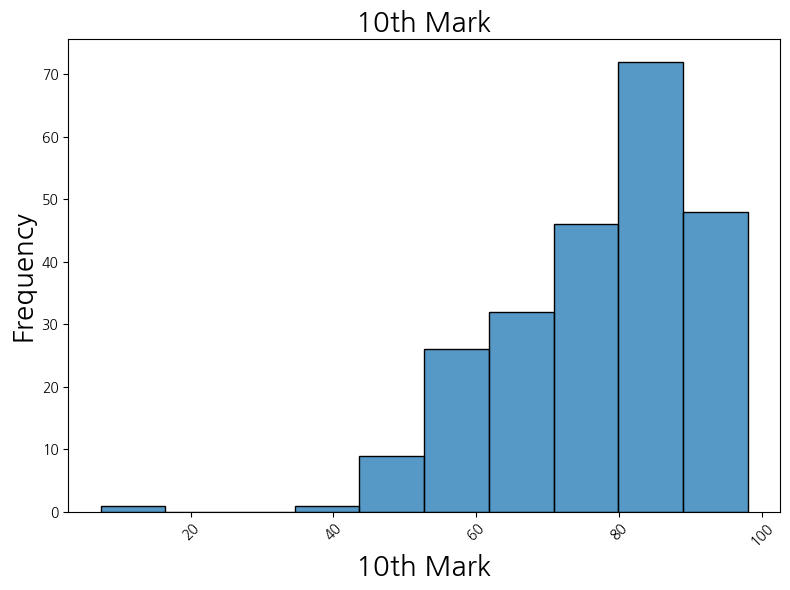

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='10th Mark', bins=10)
plt.title('10th Mark',fontsize=20)
plt.xlabel('10th Mark',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

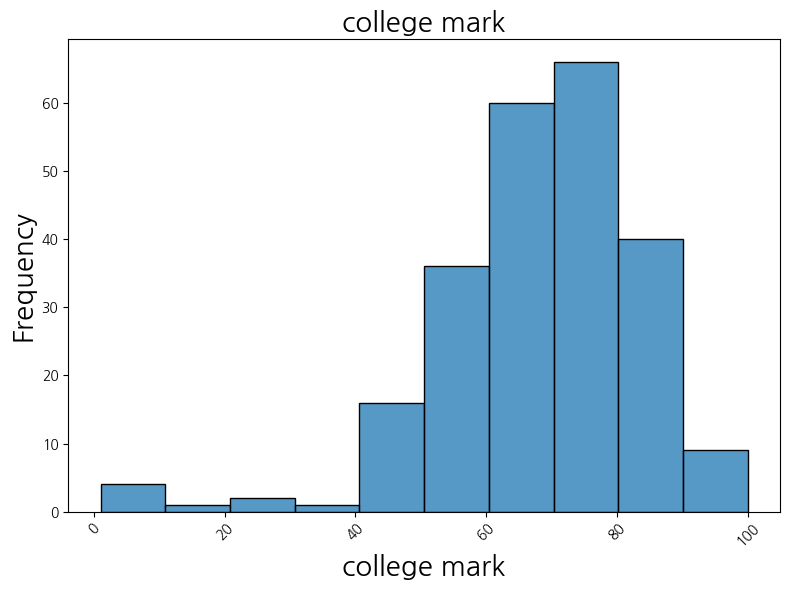

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(data=data, x='college mark', bins=10)
plt.title('college mark', fontsize=20)
plt.xlabel('college mark', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

SignificanceResult(statistic=0.55795533091408, pvalue=1.2492939041210209e-20)


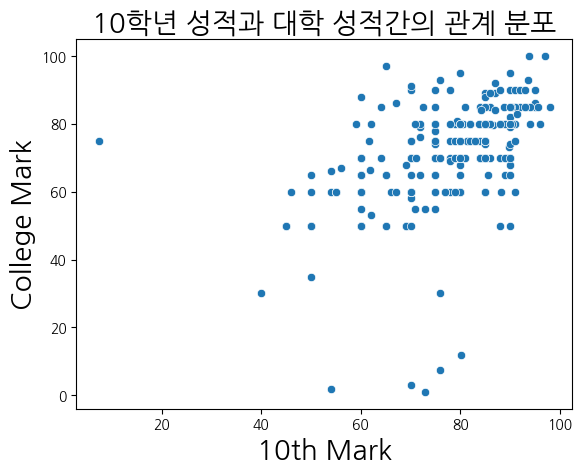

In [41]:
sns.scatterplot(x='10th Mark', y='college mark', data=data)
print(spearmanr(data['10th Mark'],data['college mark']))

# 폰트 크기 설정
plt.xlabel('10th Mark', fontsize=20)    # x축 제목
plt.ylabel('College Mark', fontsize=20)  # y축 제목
plt.title('10학년 성적과 대학 성적간의 관계 분포', fontsize=20)  # 그래프 제목

# 그래프 보여주기
plt.show()

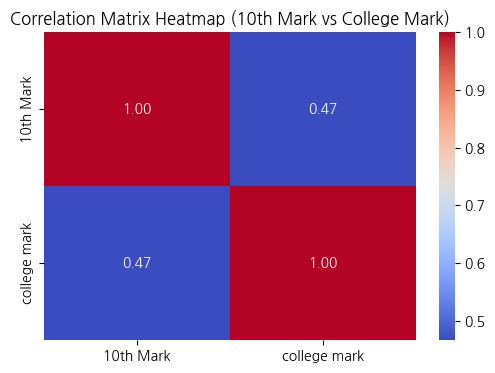

In [42]:
selected_columns = ["10th Mark", "college mark"]
correlation_matrix = data[selected_columns].corr()

# 히트맵 그리기
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Correlation Matrix Heatmap (10th Mark vs College Mark)")
plt.show()

In [43]:
spearman_corr, spearman_p_value = spearmanr(data["10th Mark"], data["college mark"])
print(f"Spearman Correlation: {spearman_corr:.4f}, p-value: {spearman_p_value}")

Spearman Correlation: 0.5580, p-value: 1.2492939041210209e-20


## 회귀분석

# 추가내용

<Figure size 1000x800 with 0 Axes>

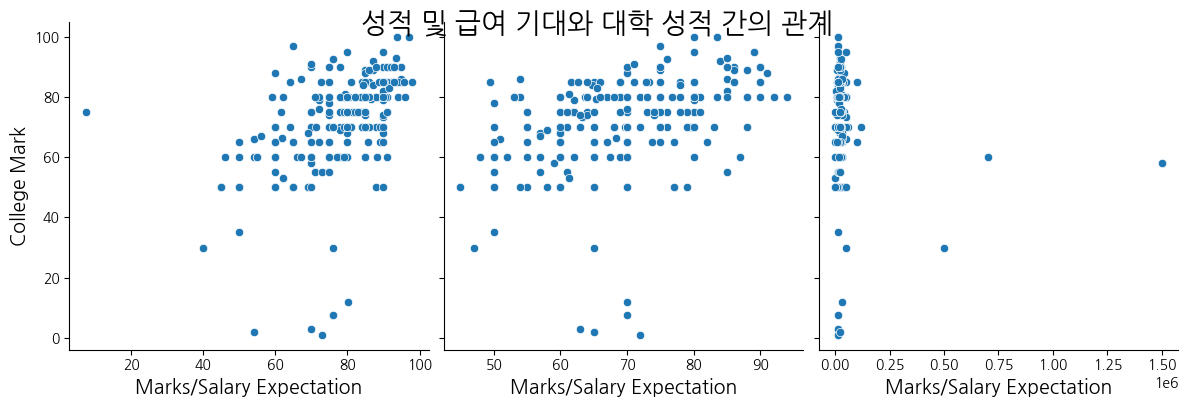

In [8]:
plt.figure(figsize=(10, 8))
pair_plot = sns.pairplot(data, x_vars=['10th Mark', '12th Mark', 'salary expectation'], 
                         y_vars=['college mark'], height=4, aspect=1, kind='scatter')
plt.suptitle('성적 및 급여 기대와 대학 성적 간의 관계', fontsize=20)  # 전체 제목 설정
# 각 축 제목 설정 (x, y 축 제목은 pairplot이 자동으로 설정하므로 개별적으로 변경 필요)
for ax in pair_plot.axes.flatten():
    ax.set_xlabel('Marks/Salary Expectation', fontsize=14)  # x축 제목
    ax.set_ylabel('College Mark', fontsize=14)  # y축 제목

# 제목이 겹치지 않도록 조정
plt.subplots_adjust(top=0.95)

# 그래프 보여주기
plt.show()

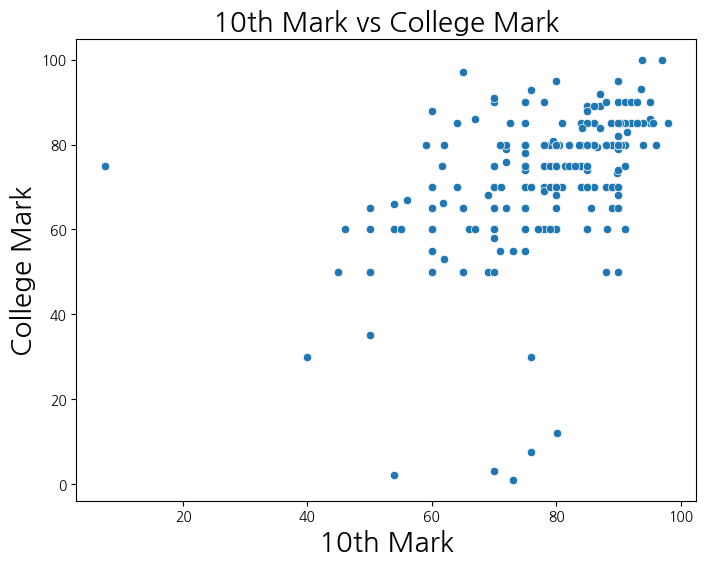

In [9]:
#따로 나눠서 plot 
# 10th Mark와 College Mark 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(x='10th Mark', y='college mark', data=data)
plt.title('10th Mark vs College Mark', fontsize=20)
plt.xlabel('10th Mark', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()
# # 12th Mark와 College Mark 관계
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='12th Mark', y='college mark', data=df)
# plt.title('12th Mark vs College Mark', fontsize=20)
# plt.xlabel('12th Mark', fontsize=20)
# plt.ylabel('College Mark', fontsize=20)
# plt.show()
# # Salary Expectation과 College Mark 관계
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x='salary expectation', y='college mark', data=df)
# plt.title('Salary Expectation vs College Mark', fontsize=20)
# plt.xlabel('Salary Expectation', fontsize=20)
# plt.ylabel('College Mark', fontsize=20)
# plt.show()

## 대본 내용: <br>
10th mark, 12th mark, salary expection과 college mark 간의 관계중 pair plot을 그려본 결과,
10th mark와 college mark 간에 선형 관계, effect가 큰 걸로 보임. <br>
따라서 10th mark와 college mark 간 linear regression을 수행했습니다.

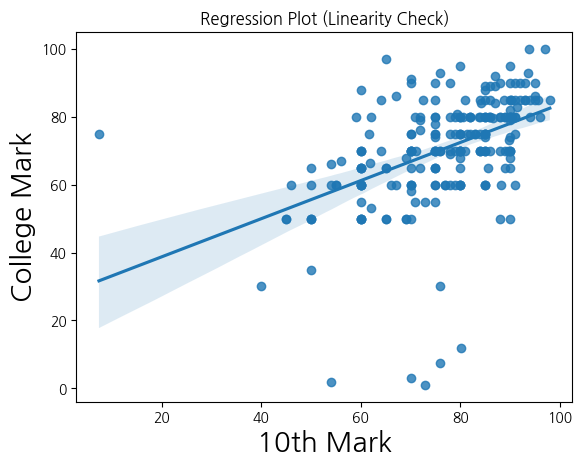

In [23]:
# 1. 선형성 & 등분산성 확인
sns.regplot(data=data, x='10th Mark', y='college mark')
plt.title("Regression Plot (Linearity Check)")
plt.xlabel('10th Mark', fontsize=20)
plt.ylabel('College Mark', fontsize=20)
plt.show()

C:\ProgramData\Anaconda3\envs\sda2024\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


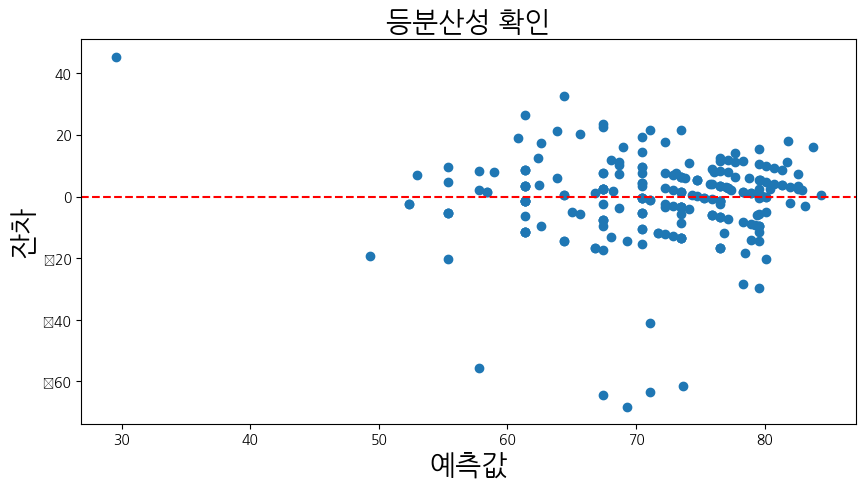

In [24]:
X = data['10th Mark']  # 독립 변수
y = data['college mark']  # 종속 변수

# 회귀 모델 적합
X = sm.add_constant(X)  # 절편 추가
model = sm.RLM(y, X).fit()
predictions = model.predict(X)
residuals = y - predictions

plt.figure(figsize=(10, 5))
plt.scatter(predictions, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('등분산성 확인',fontsize=20)
plt.xlabel('예측값',fontsize=20)
plt.ylabel('잔차',fontsize=20)
plt.show()

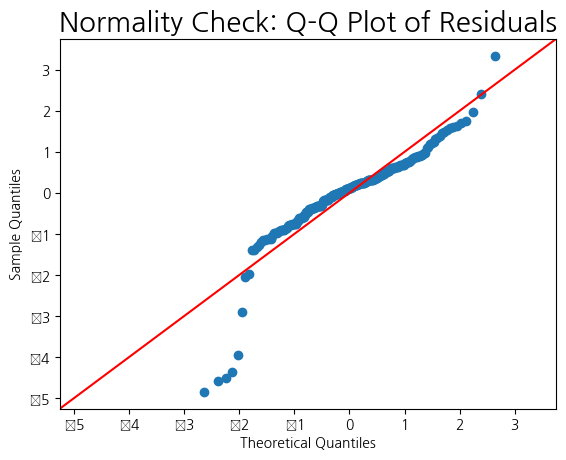

Shapiro-Wilk Test: stat=0.8554, p-value=4.619103426031605e-14
The residuals do not appear to be normally distributed (reject H0).


In [25]:
# Q-Q Plot
sm.qqplot(residuals, line='45', fit=True)
plt.title("Normality Check: Q-Q Plot of Residuals",fontsize=20)
plt.show()

# Shapiro-Wilk Test
shapiro_stat, shapiro_p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: stat={shapiro_stat:.4f}, p-value={shapiro_p_value}")

# 정규성 결과 해석
if shapiro_p_value > 0.05:
    print("The residuals appear to be normally distributed (fail to reject H0).")
else:
    print("The residuals do not appear to be normally distributed (reject H0).")

In [47]:
from statsmodels.robust.robust_linear_model import RLM
import statsmodels.api as sm

# 데이터 준비
X = sm.add_constant(data["10th Mark"])  # 상수항 추가
y = data["college mark"]

# RLM 모델 적합
model_rlm = RLM(y, X).fit()

# 결과 출력
print(model_rlm.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:           college mark   No. Observations:                  235
Model:                            RLM   Df Residuals:                      233
Method:                          IRLS   Df Model:                            1
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sat, 07 Dec 2024                                         
Time:                        15:33:27                                         
No. Iterations:                    15                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1116      3.990      6.293      0.0

In [48]:
import numpy as np

# Pseudo R-squared 계산
y_pred = model_rlm.fittedvalues  # 예측값
pseudo_r_squared = 1 - np.sum((y - y_pred)**2) / np.sum((y - np.mean(y))**2)
print(f"Pseudo R-squared: {pseudo_r_squared:.4f}")


Pseudo R-squared: 0.2122
